<a href="https://colab.research.google.com/github/malzate10/mental-Ataraxia/blob/main/Solpunto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. Despliegue un clustering K-Means para el siguiente caso de estudio. De modo que se pueda perfilar los grupos del clúste

In [1]:
!pip install scikit-learn pandas numpy matplotlib seaborn kaggle requests

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess

In [9]:
data_CL=pd.read_csv("/content/wine-clustering.csv")
data_CL.head()



,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_sc = sc.fit_transform(data_CL)

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_sc)

In [14]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
print(pca.components_)

[0.36198848 0.1920749 ]
[0.36198848 0.55406338]
[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]]


clustering KMeans


In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

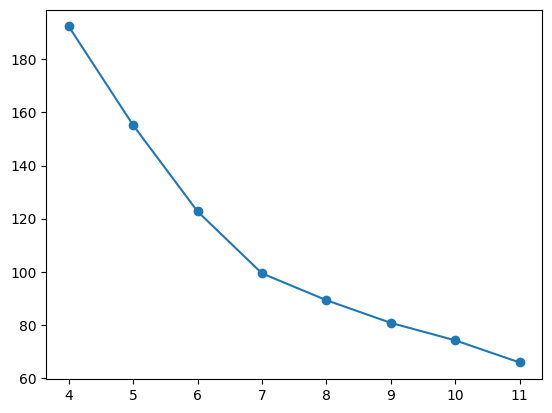

In [21]:
inercia = []

for i in range(4,12):
   cluster = KMeans(n_clusters=i,random_state=42)
   cluster.fit(data_pca)
   inercia.append(cluster.inertia_)

plt.plot(range(4,12),inercia,marker='o')
plt.show()

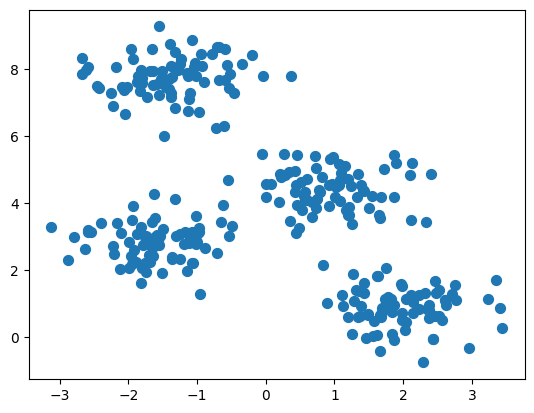

In [23]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


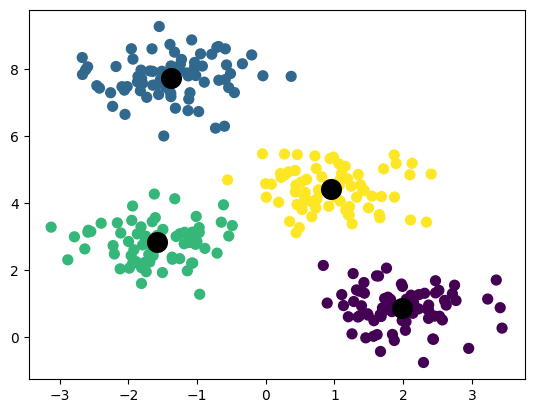

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);

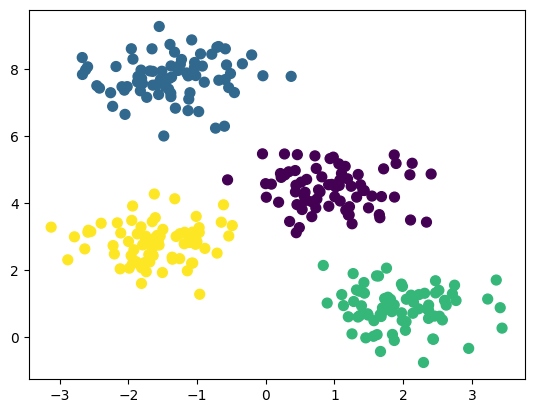

In [28]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [31]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X)
eigenvalues = pca.explained_variance_
print(eigenvalues)

[7.75945532 1.64568714]


In [35]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [36]:


kmeans.cluster_centers_

array([[ 1.98726097,  0.90144281],
       [-1.37324398,  7.75368871],
       [-0.33514647,  3.62624134]])

In [37]:
kmeans.labels_

array([0, 1, 2, 1, 0, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 2, 2,
       1, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 2, 2, 0, 0, 2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2,
       2, 2, 0, 1, 0, 2, 1, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2,
       0, 2, 1, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1,
       0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2,
       1, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 0, 2, 2, 0, 2, 1, 2, 0, 2,
       0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0,
       1, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0,
       1, 2, 1, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2], d

In [41]:
pca=PCA(n_components=2)

reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])

#Reduced Features
reduced_X.head()

,PCA1,PCA2
0,-2.016167,-0.016798
1,3.716137,-0.130038
2,0.555038,-1.523836
3,3.923475,-0.656660
4,-2.416892,-0.312859


Output

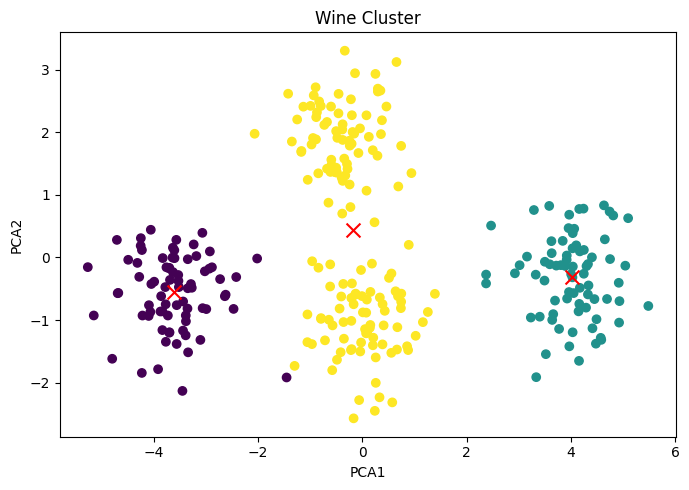

In [43]:
plt.figure(figsize=(7,5))

# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()

In [45]:
pca.components_

array([[-0.41061478,  0.91180892],
       [-0.91180892, -0.41061478]])